In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

C:\Users\Anandu Aji\AppData\Local\Temp\ipykernel_33848\2401576124.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Crop_recommendation.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
len(data['label'].unique())

22

In [9]:
df = data.copy()
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [10]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [11]:
# Accessing the mapping of numerical labels to crop names
label_mapping = {label: crop_name for label, crop_name in zip(encoder.classes_, encoder.transform(encoder.classes_))}

# Printing the mapping
print(label_mapping)


{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [12]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [13]:
x = df.drop(['label'], axis=1)
y = df['label']

In [14]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [17]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [18]:
y_train

1102    12
1159    12
141     11
1004     1
2       20
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label, Length: 1540, dtype: int32

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

In [21]:
rf = RandomForestClassifier(n_estimators=20)  # n_estimators is how much sample should the random forest take 
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
y_pred = rf.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.85      0.97      0.90        34
           9       1.00      1.00      1.00        36
          10       1.00      0.95      0.98        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       0.97      1.00      0.99        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

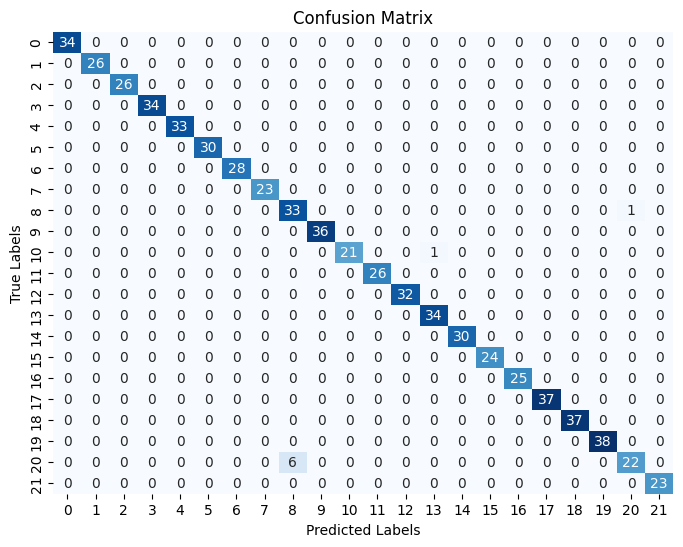

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import accuracy_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9878787878787879


In [26]:
# Single instance
single_instance = [118, 33, 30, 24.131797, 67.225123, 6.362608, 173.322839]

# Reshape to a 2D array with one row
single_instance_features = [single_instance]

# Use the StandardScaler fitted to the training data to transform the single instance
single_instance_scaled = sc.transform(single_instance_features)
# print(single_instance_scaled)

# Use the Random Forest classifier (rf) to predict the label for the scaled single instance
prediction = rf.predict(single_instance_scaled)

# Now, 'prediction' contains the predicted label for the single instance
print("Predicted label:", prediction)

# Map the predicted label back to the original crop name
predicted_crop_name = encoder.inverse_transform(prediction)

# Now, 'predicted_crop_name' contains the actual name of the predicted crop
print("Predicted crop:", predicted_crop_name)


Predicted label: [5]
Predicted crop: ['coffee']


c:\Users\Anandu Aji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(sc, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [28]:
joblib.dump(encoder, 'label_encodings.pkl')

['label_encodings.pkl']

In [29]:
df[700:]

,N,P,K,temperature,humidity,ph,rainfall,label
700,56,79,15,29.484400,63.199153,7.454532,71.890907,2
701,25,62,21,26.734340,68.139997,7.040056,67.150964,2
702,42,61,22,26.272744,62.288149,7.418651,70.232076,2
703,42,73,25,34.036792,67.211138,6.501869,73.235736,2
704,44,58,18,28.036441,65.066017,6.814411,72.495077,2
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5
